## Importing Libraries

In [1]:
# General Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# SVM
from sklearn.svm import SVC


# CV
from sklearn.model_selection import GridSearchCV

# ROC curve
from sklearn.metrics import RocCurveDisplay

# Confusion matrix result
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Import Test and Train data

In [3]:
test_data=pd.read_csv('Banking Dataset - Marketing Targets - Test.csv')
train_data=pd.read_csv('Banking Dataset - Marketing Targets - Train.csv')
train_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,29.0,10.0,0.0,3.0,0.0,0.000000,0.0,1.0,1.0,15.0,2.0,317.0,5.0,-1.0,0.0,0.0,0.0
1,57.0,0.0,2.0,1.0,0.0,396.000000,1.0,0.0,1.0,12.0,3.0,108.0,2.0,-1.0,0.0,0.0,0.0
2,54.0,3.0,0.0,3.0,0.0,714.000000,1.0,0.0,1.0,5.0,0.0,225.0,1.0,-1.0,0.0,0.0,0.0
3,52.0,7.0,0.0,1.0,0.0,2072.000000,0.0,0.0,1.0,10.0,2.0,224.0,1.0,-1.0,0.0,0.0,0.0
4,34.0,0.0,0.0,0.0,0.0,1778.000000,1.0,0.0,1.0,4.0,5.0,358.0,1.0,162.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40684,44.0,10.0,1.0,3.0,0.0,1360.860891,1.0,0.0,0.0,18.0,1.0,2093.0,1.0,-1.0,0.0,0.0,1.0
40685,23.0,11.0,1.0,1.0,0.0,508.000000,1.0,0.0,1.0,8.0,11.0,233.0,1.0,92.0,1.0,1.0,0.0
40686,34.0,1.0,2.0,0.0,0.0,1317.000000,0.0,0.0,1.0,15.0,0.0,239.0,1.0,-1.0,0.0,0.0,0.0
40687,33.0,7.0,0.0,1.0,0.0,165.000000,1.0,0.0,0.0,7.0,0.0,111.0,1.0,-1.0,0.0,0.0,0.0


## Standardize scale of data

In [4]:
from sklearn.preprocessing import StandardScaler
def Preprocessing(data):
        scaler = StandardScaler()
        col=list(data.columns)
        for i in ["job","marital","education","default","housing","loan","contact","month","poutcome",'y']:
                 col.remove(i)
        col.remove('balance')
        data['balance']=scaler.fit_transform(np.array(data['balance']).reshape(-1,1))
        for i in  col:
            n=len(str(int((max(data[i])))))
            n=10**n
            data[i]=data[i]/n
        return data

In [5]:
train_data=Preprocessing(train_data)

## Finding best model

In [6]:
X_col=['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome']
Y_col=['y']

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
svm = SVC(max_iter=500)
parameters={'C':np.logspace(-1, 1, 3),"kernel": ['rbf', 'poly'],'gamma':np.logspace(-1, 2, 4).tolist()+['scale', 'auto']}
clf = GridSearchCV(svm, parameters,cv=cv)
clf.fit(np.array(train_data[X_col]), np.array(train_data[Y_col]).ravel())

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
             estimator=SVC(max_iter=500),
             param_grid={'C': array([ 0.1,  1. , 10. ]),
                         'gamma': [0.1, 1.0, 10.0, 100.0, 'scale', 'auto'],
                         'kernel': ['rbf', 'poly']})

In [8]:
clf.best_score_

0.8830670926517572

In [9]:
clf.best_params_

{'C': 1.0, 'gamma': 100.0, 'kernel': 'rbf'}

## Display confusion matrix for train data

              precision    recall  f1-score   support

          No       0.89      1.00      0.94     35948
         Yes       0.99      0.07      0.14      4741

    accuracy                           0.89     40689
   macro avg       0.94      0.54      0.54     40689
weighted avg       0.90      0.89      0.85     40689



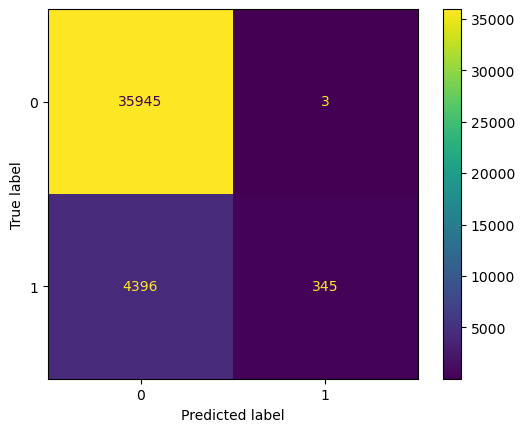

In [12]:
y_true=train_data['y']
y_pred=clf.predict(train_data[X_col])
print(classification_report(y_true, y_pred, target_names=['No','Yes']))
ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred)).plot()

## Display confusion matrix for test data

In [13]:
test_data=Preprocessing(test_data)

              precision    recall  f1-score   support

          No       0.88      1.00      0.93      3960
         Yes       0.62      0.01      0.02       562

    accuracy                           0.88      4522
   macro avg       0.75      0.50      0.48      4522
weighted avg       0.85      0.88      0.82      4522



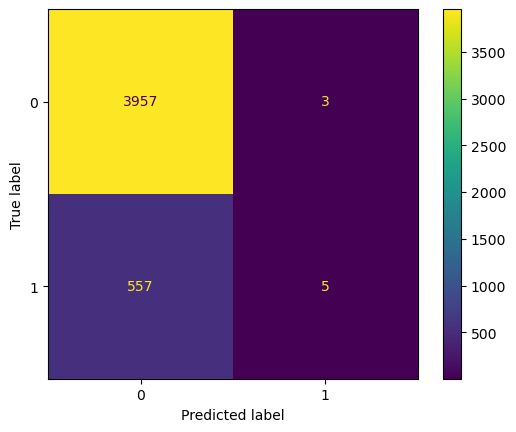

In [14]:
y_pred=clf.predict(test_data[X_col])
y_true=test_data['y']
print(classification_report(y_true, y_pred,target_names=['No','Yes']))
ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred)).plot()